### **Hierarchical clustering with Dendogram and AgglomerativeClustering and Elbow method**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
beer_df = pd.read_csv("beer.csv")
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [7]:
from sklearn.preprocessing import StandardScaler

# scale the all numerical columns 
scaler = StandardScaler()
scaled_beer_df = pd.DataFrame(scaler.fit_transform(beer_df[['calories','sodium','alcohol','cost']]))
scaled_beer_df.head()

,0,1,2,3
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265


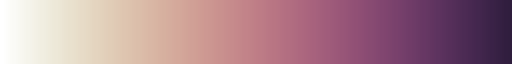

In [19]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=.5, light=1)
cmap

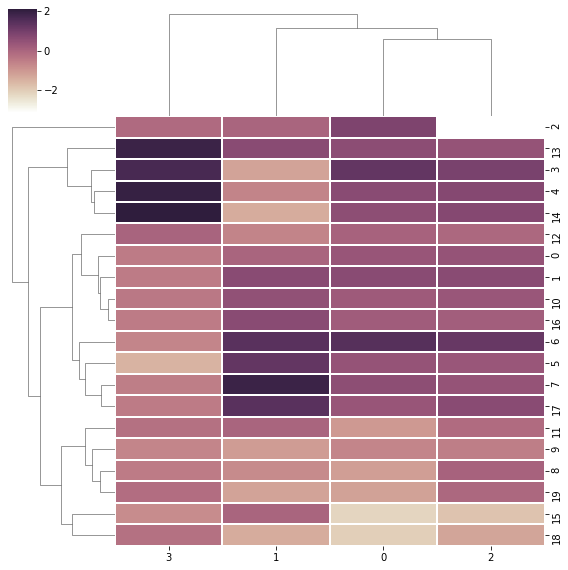

In [27]:
sns.clustermap(scaled_beer_df, cmap=cmap, linewidths=-0.2, figsize=(8,8))

### How to interpret the dendogram??

In [44]:
# Note that index number 8 and 19 are having least destance betwen them, so products miller_lite and schlits_light
# having almost same characteristics
beer_df.loc[[8,19]]

,name,calories,sodium,alcohol,cost,Clusterid,h_clusters
8,Miller_Lite,99,10,4.3,0.43,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [23]:
# index number 2 and 18 are having highest distance between them as can see the characteristics and features.
beer_df.loc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


In [29]:
# Some name of the brands with highest calories, alcohol and cost
beer_df.loc[[3,4,13,14]]

,name,calories,sodium,alcohol,cost
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
13,Becks,150,19,4.7,0.76
14,Kirin,149,6,5.0,0.79


In [28]:
# In these group of index numbers sodium contain is the highest
beer_df.loc[[5,6,7,17]]

,name,calories,sodium,alcohol,cost
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
17,Heilemans_Old_Style,144,24,4.9,0.43


### **Elbow Method**

This method is based on sum of squared error of each clusters based on number of clusters assigned in data.

#### Explination of Elbow method:

if we assume all the products belong ot only one segment, then the variance of cluster will be highest. As we increse the number of clusters, the total variance of all clusters will start reducing, BUt the total variance will be zero if we assume each product is cluster by itself. So, Elbow curve method considers the percentage of variance explained as a functions of the number of clusters. The Oplimal number of clusters is chosen in such a way that adding another cluster does not change the variance explained significantly. 

For a set of records (X1, X2,...Xn), where each observations is a d-dimensional real vector, K-means clustering algorithm segments the observations the observations into k sets S = {S1,S2, ...,Sn} to minimize the within-cluster sum of squares (WCSS). WCSS is the sum of distances of each point in the clsuter to the center of cluster across k clusters. 

As Per WCSS, optimal number of clusters will be at number, that is at elbow of the curve. below is the code to fit KMeans for range of clusters and plot an elbow curve.

**Reference**: Machine learning using python by U Dinesh Kumar

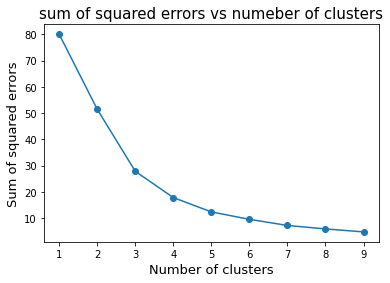

In [40]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker='o')
plt.title("sum of squared errors vs numeber of clusters", fontsize=15)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("Sum of squared errors", fontsize=13)
plt.show() 

Here we can learn that 3 is at elbow of the curve, so ideal clusters that exist in dataset are 3 with optimal SSE(Sum of Squared Error)

In [42]:
# Now let's create clusters with optimal clusters in dataset.
k=3

clusters = KMeans(k, random_state=42)
clusters.fit(scaled_beer_df)
beer_df['Clusterid'] = clusters.labels_
beer_df.head()

,name,calories,sodium,alcohol,cost,Clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,1
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2


#### **AgglomerativeClustering**

Hierarchical clustering is a clusteing algorithm which uses the following steps to develop clusters.

1. Start with each data point in a single cluster
2. Find the data points with the shortest distance and merge them to form a cluster.
3. Repeat step 2 until all data points are merged together to form a single cluster.

This procedure is called an agglomerative hierarchical cluster which is implemented.

In [43]:
# using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df['h_clusters'] = h_clusters.labels_
beer_df.head()

,name,calories,sodium,alcohol,cost,Clusterid,h_clusters
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,1,0
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
